In [1]:
# NetCDF packages
import netCDF4
from netCDF4 import Dataset
import xarray
import xarray as xr

# Matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import LineCollection, PolyCollection
%matplotlib inline

# Cartopy
import cartopy.feature
from cartopy.mpl.patch import geos_to_path
import cartopy.crs as ccrs

# MetPy packages
import metpy.calc as mpcalc
from metpy.testing import get_test_data
from metpy.units import units

# Scientific
import numpy as np
import pandas as pd

In [2]:
ds = xr.open_dataset('../datasets/ds_1_point.nc',decode_times=False)
ds

<xarray.Dataset>
Dimensions:         (obs: 232323, qc_copy: 1)
Coordinates:
    time            (obs) float64 ...
    lon             (obs) float64 ...
    lat             (obs) float64 ...
    vertical        (obs) float64 ...
  * qc_copy         (qc_copy) int32 1
Dimensions without coordinates: obs
Data variables:
    vertical_type   (obs) float64 ...
    observation     (obs) float64 ...
    truth           (obs) float64 ...
    error_variance  (obs) float64 ...
    obs_type        (obs) int32 ...
    qc              (obs, qc_copy) int32 ...
    obs_key         (obs) int32 ...
Attributes:
    featureType:    point
    title:          Restructured netCDF file from Nancy
    author:         Jason Ngo, SIParCS Intern
    source:         Nancy Collins, NCAR|UCAR
    conventions:    CF-1.7
    creation_date:  YYYY MM DD HH MM SS = 2019 06 30 16 05 57

In [3]:
lon, lat, vert, time = ds['lon'].values, ds['lat'].values, ds['vertical'].values, ds['time'].values
observation = ds['observation'].values

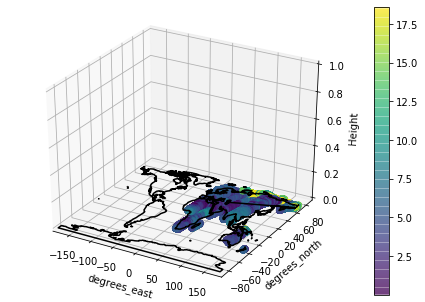

In [6]:
import itertools
fig = plt.figure()
ax = Axes3D(fig, xlim=[-180, 180], ylim=[-90, 90])
ax.set_zlim(bottom=0)

concat = lambda iterable: list(itertools.chain.from_iterable(iterable))

target_projection = ccrs.PlateCarree()

feature = cartopy.feature.NaturalEarthFeature('physical', 'land', '110m')
geoms = feature.geometries()

geoms = [target_projection.project_geometry(geom, feature.crs)
         for geom in geoms]

paths = concat(geos_to_path(geom) for geom in geoms)

COLOR = False
if COLOR:
    polys = concat(path.to_polygons() for path in paths)
    lc = PolyCollection(polys, edgecolor='black',
                        facecolor='green', closed=False)
else:
    segments = []
    for path in paths:
        vertices = [vertex for vertex, _ in path.iter_segments()]
        vertices = np.asarray(vertices)
        segments.append(vertices)
    lc = LineCollection(segments, color='black')

sc = ax.scatter(lon,lat,vert,c=observation,s=35,alpha=0.5)

ax.add_collection3d(lc)
ax.add_collection3d(sc)

plt.colorbar(sc)

ax.set_xlabel('degrees_east')
ax.set_ylabel('degrees_north')
ax.set_zlabel('Height')

plt.show()